# BITCOIN BASIC ANALYSIS


In [1]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
cryptocurrencies = ['BTC-USD']

We want to see the changes in the crypto market since the beginning of the Covid 19 pandemic. Thus the start date is the first of January 2020

We can simply download the data with the code given below:

In [34]:
data = yf.download(cryptocurrencies, start='2020-01-01',
                end='2021-12-12')
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+00:00,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02 00:00:00+00:00,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03 00:00:00+00:00,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04 00:00:00+00:00,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05 00:00:00+00:00,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


# check for missing data

In [35]:
data.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

# Exploratory Analysis
We are interested in the adjusted closing price. Therefore, we’ll select the adjusted-close price of the cryptocurrencies.

In [36]:
adj_close=data['Adj Close']
adj_close.head()

Date
2020-01-01 00:00:00+00:00    7200.174316
2020-01-02 00:00:00+00:00    6985.470215
2020-01-03 00:00:00+00:00    7344.884277
2020-01-04 00:00:00+00:00    7410.656738
2020-01-05 00:00:00+00:00    7411.317383
Name: Adj Close, dtype: float64

# ploting the adjusted closing price

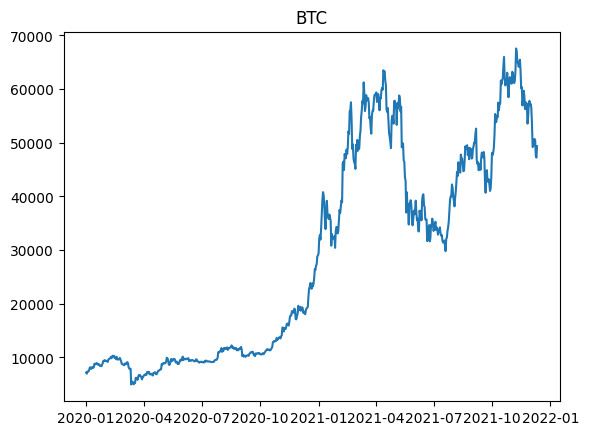

In [40]:
# ploting the adjusted closing price((
plt.plot(adj_close)
plt.title("BTC")
plt.show()

# Return Series
A return is a change in the price of an asset over time. Returns can be positive, representing a profit, or negative, indicating a loss. Return series of an asset are easier to handle than price series and give a complete summary of the investment opportunity.

We will use the pandas pct_change() function to compute the returns

In [42]:
returns = adj_close.pct_change().dropna(axis=0)
returns.head()

Date
2020-01-02 00:00:00+00:00   -0.029819
2020-01-03 00:00:00+00:00    0.051452
2020-01-04 00:00:00+00:00    0.008955
2020-01-05 00:00:00+00:00    0.000089
2020-01-06 00:00:00+00:00    0.048291
Name: Adj Close, dtype: float64

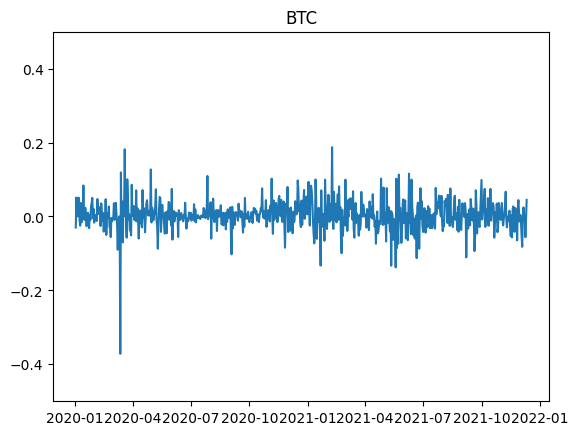

In [45]:
#ploting the returns
plt.plot(returns)
plt.title('BTC')
plt.ylim([-0.5,0.5])
plt.show()


# Bitcoin is the less volatile

# Volatilty
Volatility is a measure of change in the price of an asset over time. The higher the standard deviation, the more volatile an asset is.

In [46]:
returns.std()

0.04021293105554978

# HISTOGRAM

Text(0.5, 1.0, 'BTC')

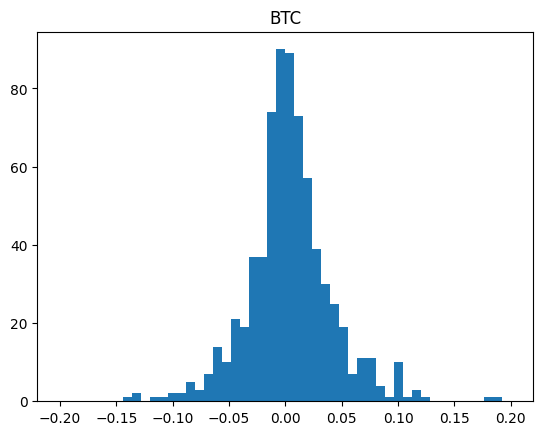

In [47]:
plt.hist(returns,bins=50,range=(-0.2,0.2))
plt.title("BTC")

# Cumulative Returns
Cumulative return express the total change in the price of an asset over time.

We use the pandas cumprod() function to calculate the daily cumulative simple returns.

In [48]:
cum_returns = ((1 + returns).cumprod() - 1) *100
cum_returns.head()

Date
2020-01-02 00:00:00+00:00   -2.981929
2020-01-03 00:00:00+00:00    2.009812
2020-01-04 00:00:00+00:00    2.923296
2020-01-05 00:00:00+00:00    2.932472
2020-01-06 00:00:00+00:00    7.903210
Name: Adj Close, dtype: float64

Text(0.5, 1.0, 'Cumulative Returns')

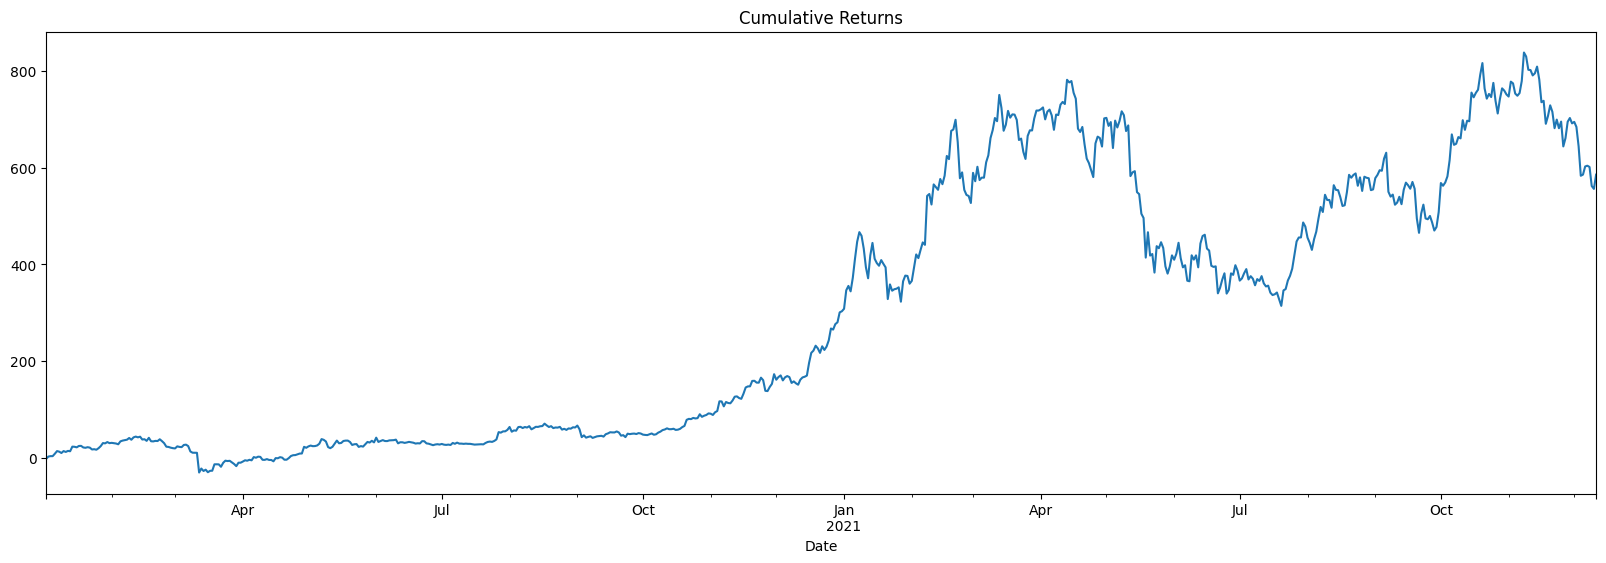

In [50]:
cum_returns.plot(figsize=(20,6))
plt.title('Cumulative Returns')


# Moving Average
Moving average (rolling average) is used to smooth out short-term fluctuations to identify long-term trends or cycles. For example, a 7-day moving average reflects short-term trends in the stock market, whereas a 200-day rolling average indicates major trends in the stock market. Here we calculate the arithmetic mean of a given set of prices over a specified period.

In [53]:
# compute a short-term 20-day moving average
MA20 = adj_close.rolling(20).mean()
# compute a Long-term 50-day moving average
MA50 = adj_close.rolling(100).mean()
# compute a Long-term 100-day moving average
MA100 = adj_close.rolling(100).mean()

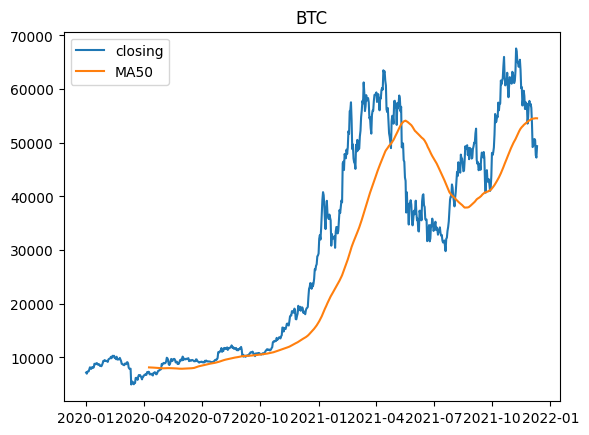

In [60]:
fig, axs = plt.subplots()
axs.plot(adj_close, label= 'closing')
axs.plot(MA50, label= 'MA50')
axs.set_title('BTC')
axs.legend()
plt.show()

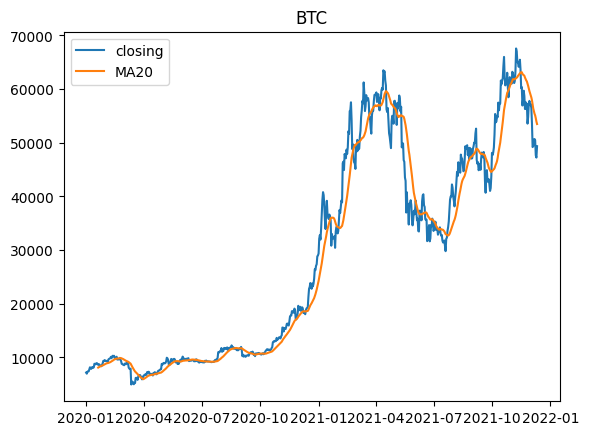

In [61]:
fig, axs = plt.subplots()
axs.plot(adj_close, label= 'closing')
axs.plot(MA20, label= 'MA20')
axs.set_title('BTC')
axs.legend()
plt.show()

We can observe from the charts that around mid-May of 2021, the 20-day MA crosses below the 100-day MA. It indicates that the trend is shifting downwards, and it’s a sell signal. Towards the end of August, the 20-day MA crosses above the 100-day MA. It shows that the trend is shifting upwards, and it’s a buy signal.